# Задание 5. Извлечение данных 

## Задание 5.1

Напишите скрипт, который скачивает  сообщения с Телеграм-канала https://t.me/Sputnik_results . Сохраните сообщения в формате по вашему выбору (.csv, .jsonl, sqlite, parquet, и т.д.). Откройте с помощью Pandas или аналогичных библиотек, постройте график числа сообщений в зависимости от даты. 

In [1]:
!pip install telethon

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 585.6/585.6 KB 8.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyaes: filename=pyaes-1.6.1-py3-none-any.whl size=26363 sha256=9e1f99cd5465e654502404fb0b1b53d2dba77e48fd7c29dfa90a69ca18517778
  Stored in directory: /root/.cache/pip/wheels/aa/ca/9c/8a3c00512585c703edc457db81c066b9609d76758c74f72ac6
Successfully built pyaes


In [42]:
!python grabber.py

Выходные данные были обрезаны до нескольких последних строк (5000).
Ж32 v1 17.10.20, v2 06.11.20,в первую прививку немного температура была ок. 37,рука болела, вторая прошла незаметно)

-----------------
Сообщение 8852
Date: 2021-06-29 09:55:05+00:00
Ж26 
Без хз, болела то ли в октябре, то ли в декабре. антитела на январь 2021: 10:33 (сдавала в CMD) 

V1 (Спутник) - 26.06
через 12 часов боль в месте укола, t 37,4, затем поднялась до 37,9, заболела голова. приняла жаропонижающее. голова ещё какое-то время болела, но после второй таблетки обезболивающего прошла. 
в остальном полет нормальный, но очень тревожно(

-----------------
Сообщение 8853
Date: 2021-06-29 09:47:40+00:00
Ж 57 (моя мама), Спутник V. Без хронических заболеваний, гипертония, раннее не болела. 

V1 - 23.05 - в течении 1-го и 2-го дня тянущая боль в области укола, незначительная головная боль. Температура в норме  

V2 - 14.06 - небольшая слабость, сонливость, также боль в области укола. Температура в норме. 

В середине

In [43]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/results.csv')

l = len(data)

data['day'] = ''

In [45]:
import re

rexp = r'\b\d{4}-\d{2}-\d{2}\b'

for i in range(l):
  
    s = data['date'][i]
    m = re.search(rexp, s)
    
    data.at[i, 'day'] = m.group()
    

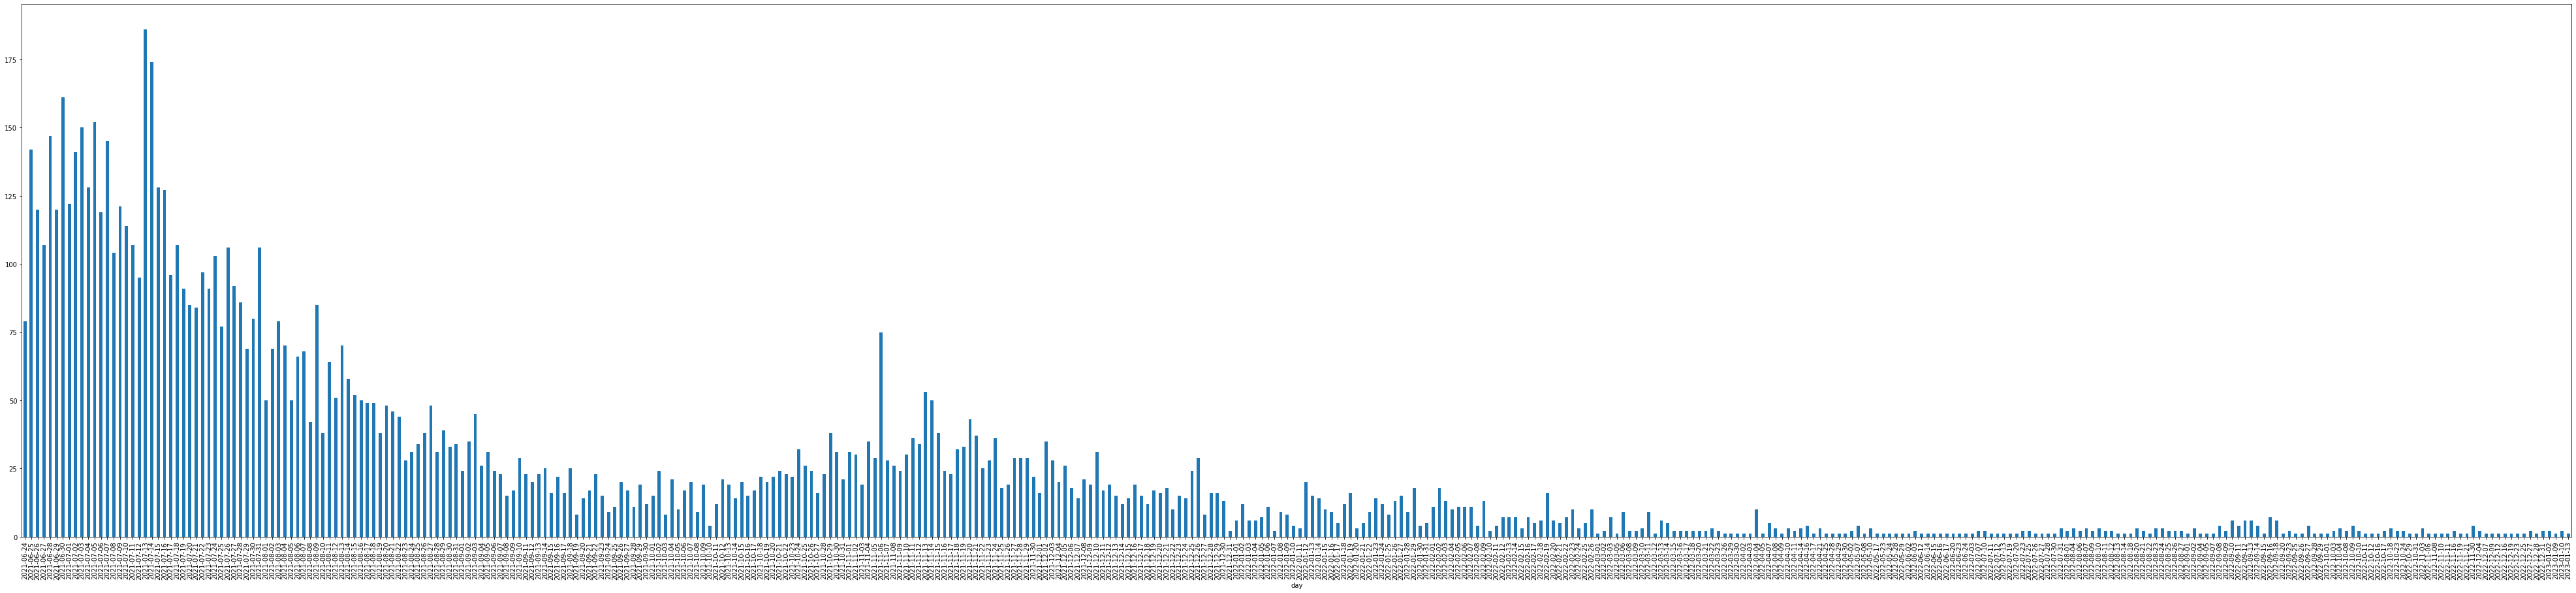

In [54]:
import matplotlib.pyplot as plt

count_message_by_day = data.groupby('day')['day'].count()

plt.figure(figsize=(70, 15))

count_message_by_day.plot(kind='bar')

plt.xticks(rotation=90)

plt.savefig('messages_vs_dates.png')

## Задание 5.2
1.Напишите функции для извлечения данных из сообщений:
   - пол участника
   - возраст участника

   Постройте диаграммы для визуализации. 

In [55]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import numpy as np

In [56]:
data = pd.read_csv('/content/results.csv')

l = len(data)

data['text'] = data['text'].apply(lambda x: x.replace('\n', ' '))
data['sex'] = None
data['age'] = None
data['anon'] = None

In [57]:
import re

def reResearchSexAge(s):
    """
    Берём s string, выдаём (sex, age), если присутствуют в тексте,
    либо (None, None)
    """
    rexp = r'\b[мжМЖ], \d{1,2}\b|\b[мжЖМ] \d{1,2}\b|\b[мжМЖ], \d{1,2}\b|\b[мжМЖ]., \d{1,2}\b|\b[мжЖМ]\d{1,2}\b|\b[мжМЖ],\d{1,2}\b|\b[мжМЖ].\d{1,2}\b|\b[мжМЖ]. \d{1,2}\b'

    rexp_sex = r'[мжМЖ]'
    resp_age = r'\d{1,2}'

    m = re.search(rexp, s)
    if m is None:
      # print('Пол и возраст неизвестны')
      return (None, None)
    else:
      m = m.group()
      sex, age = re.search(rexp_sex, m), re.search(resp_age, m)
      return sex.group(), age.group()

def reResearchAnonym(s):
    """
    Определяем, является ли отчёт анонимным
    """
    rexp = r'Анонимный|анонимный'
    m = re.search(rexp, s)
    if m is None:
        return False
    else:
        return True

In [58]:
# заполняем колонки пола, возраста и анонимности отзыва
for i in range(l):
    s = data['text'][i]

    sex, age = reResearchSexAge(s)
    data.at[i, 'sex'] = sex
    data.at[i, 'age'] = age

    data.at[i, 'anon'] = reResearchAnonym(s)

In [59]:
dictionary = {'Ж': 0, 'М': 1, 'ж': 0, 'м': 1, None: -1}
revers_dict = {0: 'Ж', 1: 'М', -1: None}

data['sex'] = data['sex'].replace(dictionary)
data['age'] = data['age'].replace(dictionary)
data['age'] = data['age'].apply(lambda x: int(x))

In [60]:
# уберём сообщения, которые не являются анонимными и при этом
# не содержат информации о поле/возрасте
data = data.drop(data[(data['anon'] == False) & (data['sex'] == -1)].index)

In [61]:
# отобразим только неанонимные сообщения
data[data['anon'] == False]

,date,text,sex,age,anon
5,2023-01-02 00:32:16+00:00,"Ж, 20 лет, умеренный аллергик. Сделала Спутник...",0,20,False
7,2022-12-31 14:06:17+00:00,"#ревак #назально #спутник Ж53, ковидом не бол...",0,53,False
11,2022-12-25 11:24:02+00:00,#назально #ревак #спутник-V М33. 1 комп.: легк...,1,33,False
13,2022-12-19 14:35:43+00:00,#назально #ревак. Ж35. Хр. Заболевания: полива...,0,35,False
15,2022-12-12 23:10:46+00:00,#дети М 13 лет. спутник м. 1я доза 23.10.22....,1,13,False
...,...,...,...,...,...
9468,2021-06-24 15:15:37+00:00,М18 Пфайзер 10 мая первая доза. Боль в руке. Д...,1,18,False
9470,2021-06-24 14:55:56+00:00,"М23, прививался гам-ковид-вак 08.02.2021 - пер...",1,23,False
9471,2021-06-24 14:55:09+00:00,"М38, Март 2020: Болел ковидом дома 7 дней 37....",1,38,False
9472,2021-06-24 14:52:34+00:00,М40. Синдром Такаясу (Неспецифический аортоарт...,1,40,False


In [62]:
count_sex = data[data['anon'] == False].groupby('sex')['sex'].count()

count_anon = data.groupby('anon')['anon'].count()

count_age = data[data['anon'] == False].groupby('age')['age'].count()

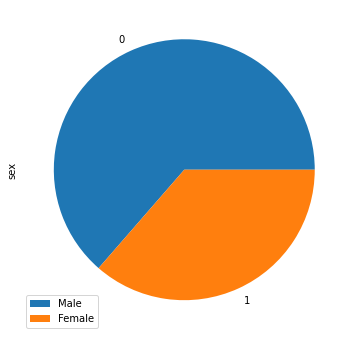

In [63]:
plt.figure(figsize=(8, 6))

count_sex.plot(kind='pie')

plt.legend(['Male', 'Female'])

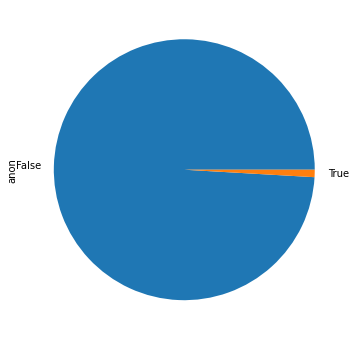

In [64]:
plt.figure(figsize=(8, 6))

count_anon.plot.pie()

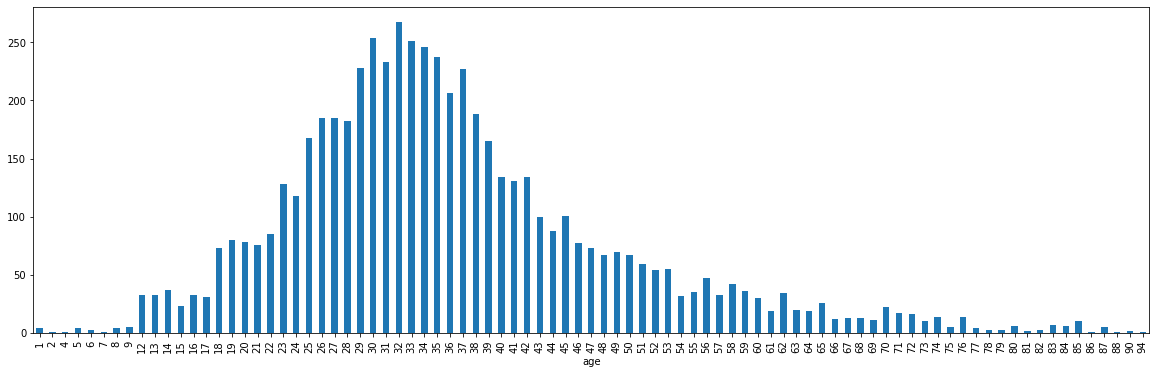

In [66]:
plt.figure(figsize=(20, 6))

count_age.plot.bar()

2.Реализуйте какой-либо анализ этих данных на ваше усмотрение. Например их можно кластеризовать и интерпретировать кластеры, или попробовать выделить статистику по среднему количеству антител в зависимости от возраста, или посчитать количество заболевших после вакцинации. Обязательна визуализация. 

In [125]:
def whichVaccine(s):
  s = s.lower()
  rexp_sputnik = r'спутник|гам[-\s+]?к[оа]вид[-\s+]?вак'
  rexp_moderna = r'м[оа]дерна|м[оа]дера|moderna'
  rexp_astra = r'astra[-\s+]?zeneca|астра[-\s+]?з[еэ]нека'
  rexp_covivac = r'covi[-\s]?vac|кови[-\s]?вак|к[оа]ви[-\s]?вак[-\s]?к[оа]рона'
  rexp_epivac = r'эпи[-\s]?вак|эпи[-\s]?вак[-\s]?к[оа]рона'
  
  m = re.search(rexp_sputnik, s)
  if m is None:
    m = re.search(rexp_moderna, s)
    if m is None:
      m = re.search(rexp_astra, s)
      if m is None:
        m = re.search(rexp_covivac, s)
        if m is None:
          m = re.search(rexp_epivac, s)
          if m is None:
            return '-'
          else:
            return 'эпиваккорона'
        else:
          return 'ковивак'
      else:
        return 'astra zeneca'
    else:
      return 'moderna'
  else:
    return 'спутник'

In [132]:
data_clean = data.reset_index()[['date', 'text', 'sex', 'age', 'anon']]

data_clean['вакцина'] = ''

for i in range(len(data_clean)):
  data_clean.at[i, 'вакцина'] = whichVaccine(data_clean['text'][i])

data_clean = data_clean[data_clean['вакцина'] != '-']

In [135]:
def sideEffects(s):
    s = s.lower()

    rexp_effect = r'нет[\s+]?ня|никаких[\s+]?ня|без[\s+]?ня|реакций[\s+]?не|реакции[\s+]?не|никаких[\s+]?побочных|нежелательных[\s+]?явлений[\s+]?не' + \
    r'|никакой[\s+]?реакции|без[\s+]?побоч'

    m = re.search(rexp_effect, s)
    if m is None:
        return 'Yes'
    else:
        return 'No'

In [145]:
data_clean = data_clean.reset_index()[['date', 'text', 'sex', 'age', 'anon', 'вакцина', 'побочки']]

data_clean['побочки'] = ''

for i in range(len(data_clean)):
  data_clean.at[i, 'побочки'] = sideEffects(data_clean['text'][i])

data_clean

,date,text,sex,age,anon,вакцина,побочки
0,2023-01-02 00:32:16+00:00,"Ж, 20 лет, умеренный аллергик. Сделала Спутник...",0,20,False,спутник,Yes
1,2022-12-31 14:06:17+00:00,"#ревак #назально #спутник Ж53, ковидом не бол...",0,53,False,спутник,Yes
2,2022-12-25 11:24:02+00:00,#назально #ревак #спутник-V М33. 1 комп.: легк...,1,33,False,спутник,Yes
3,2022-12-19 14:35:43+00:00,#назально #ревак. Ж35. Хр. Заболевания: полива...,0,35,False,спутник,Yes
4,2022-12-12 23:10:46+00:00,#дети М 13 лет. спутник м. 1я доза 23.10.22....,1,13,False,спутник,Yes
...,...,...,...,...,...,...,...
3727,2021-06-24 15:19:11+00:00,"Ж, 29, ковид в сентябре 2020, поражение лёгких...",0,29,False,спутник,Yes
3728,2021-06-24 14:55:56+00:00,"М23, прививался гам-ковид-вак 08.02.2021 - пер...",1,23,False,спутник,Yes
3729,2021-06-24 14:55:09+00:00,"М38, Март 2020: Болел ковидом дома 7 дней 37....",1,38,False,спутник,Yes
3730,2021-06-24 14:52:34+00:00,М40. Синдром Такаясу (Неспецифический аортоарт...,1,40,False,спутник,No


**Спутник**

<BarContainer object of 72 artists>

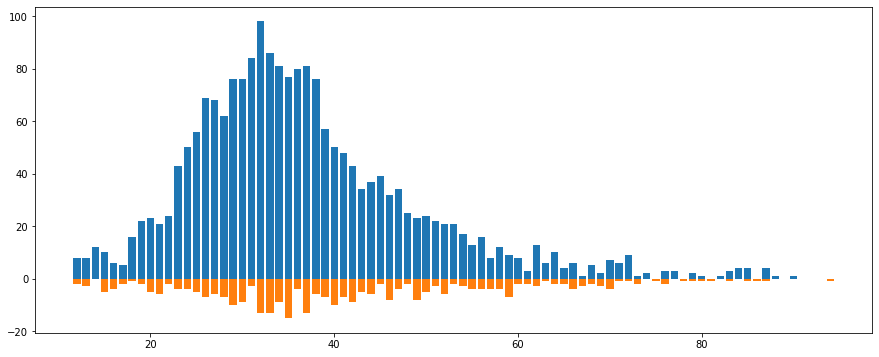

In [202]:
data_sputnik = data_clean[data_clean['вакцина'] == 'спутник'][['sex', 'age', 'побочки']]

data_sputnik['побочки'] = data_sputnik['побочки'].replace({'Yes': 1, 'No': -1})
data_sputnik_male = data_sputnik[data_sputnik['sex'] == 0][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_sputnik_male_pos = data_sputnik_male[data_sputnik_male['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_sputnik_male_pos['age'], data_sputnik_male_pos['побочки'])

data_sputnik_male_neg = data_sputnik_male[data_sputnik_male['побочки'] == -1].groupby('age', as_index = False).count()
data_sputnik_male_neg['побочки'] = data_sputnik_male_neg['побочки'] * -1
plt.bar(data_sputnik_male_neg['age'], data_sputnik_male_neg['побочки'])

<BarContainer object of 59 artists>

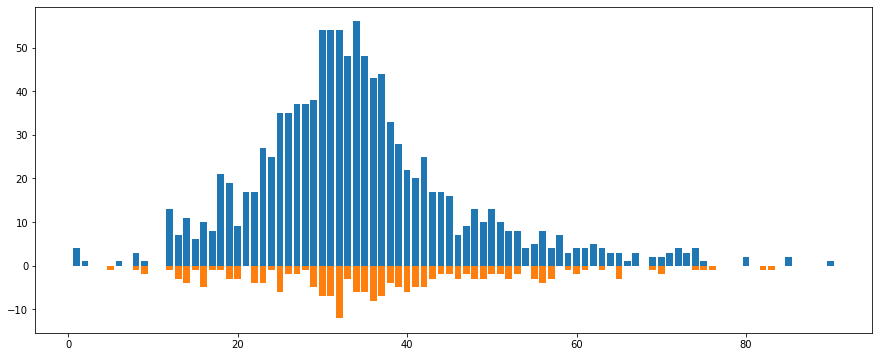

In [218]:
data_sputnik = data_clean[data_clean['вакцина'] == 'спутник'][['sex', 'age', 'побочки']]

data_sputnik['побочки'] = data_sputnik['побочки'].replace({'Yes': 1, 'No': -1})
data_sputnik_female = data_sputnik[data_sputnik['sex'] == 1][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_sputnik_female_pos = data_sputnik_female[data_sputnik_female['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_sputnik_female_pos['age'], data_sputnik_female_pos['побочки'])

data_sputnik_female_neg = data_sputnik_female[data_sputnik_female['побочки'] == -1].groupby('age', as_index = False).count()
data_sputnik_female_neg['побочки'] = data_sputnik_female_neg['побочки'] * -1
plt.bar(data_sputnik_female_neg['age'], data_sputnik_female_neg['побочки'])

Из этих данных можем увидеть, что данные распределены примерно одинаково нормально, но со смещёнными центрами. Количество людей с побочными эффектами значительно превалирует.

**Эпивак**

<BarContainer object of 2 artists>

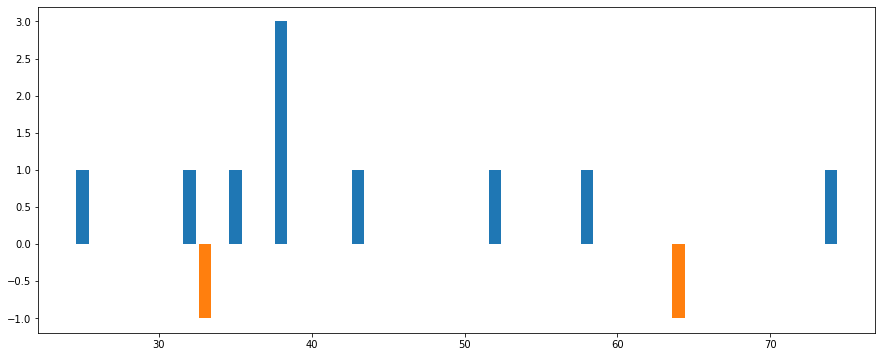

In [210]:
data_epivak = data_clean[data_clean['вакцина'] == 'эпиваккорона'][['sex', 'age', 'побочки']]

data_epivak['побочки'] = data_epivak['побочки'].replace({'Yes': 1, 'No': -1})
data_epivak_male = data_epivak[data_epivak['sex'] == 0][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_epivak_male_pos = data_epivak_male[data_epivak_male['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_epivak_male_pos['age'], data_epivak_male_pos['побочки'])

data_epivak_male_neg = data_epivak_male[data_epivak_male['побочки'] == -1].groupby('age', as_index = False).count()
data_epivak_male_neg['побочки'] = data_epivak_male_neg['побочки'] * -1
plt.bar(data_epivak_male_neg['age'], data_epivak_male_neg['побочки'])

<BarContainer object of 1 artists>

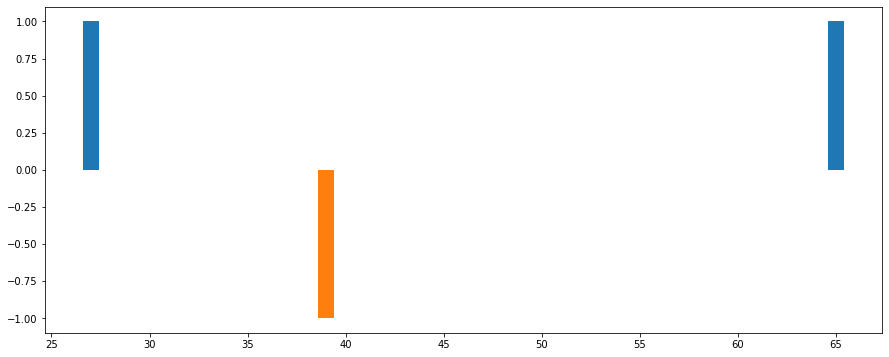

In [217]:
data_epivak = data_clean[data_clean['вакцина'] == 'эпиваккорона'][['sex', 'age', 'побочки']]

data_epivak['побочки'] = data_epivak['побочки'].replace({'Yes': 1, 'No': -1})
data_epivak_female = data_epivak[data_epivak['sex'] == 1][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_epivak_female_pos = data_epivak_female[data_epivak_female['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_epivak_female_pos['age'], data_epivak_female_pos['побочки'])

data_epivak_female_neg = data_epivak_female[data_epivak_female['побочки'] == -1].groupby('age', as_index = False).count()
data_epivak_female_neg['побочки'] = data_epivak_female_neg['побочки'] * -1
plt.bar(data_epivak_female_neg['age'], data_epivak_female_neg['побочки'])

**Ковивак**

<BarContainer object of 4 artists>

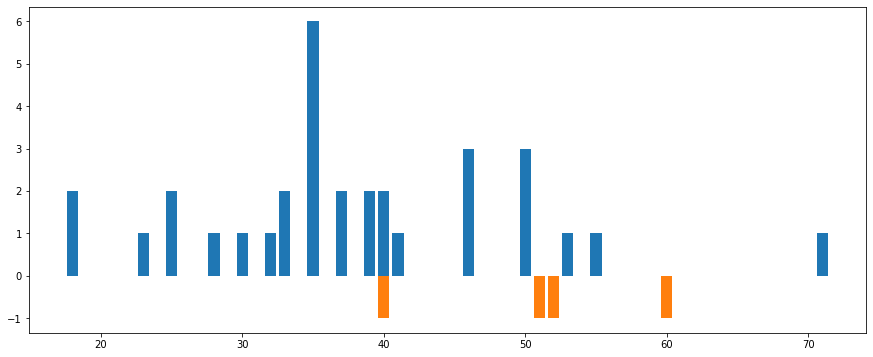

In [211]:
data_kovivak = data_clean[data_clean['вакцина'] == 'ковивак'][['sex', 'age', 'побочки']]

data_kovivak['побочки'] = data_kovivak['побочки'].replace({'Yes': 1, 'No': -1})
data_kovivak_male = data_kovivak[data_kovivak['sex'] == 0][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_kovivak_male_pos = data_kovivak_male[data_kovivak_male['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_kovivak_male_pos['age'], data_kovivak_male_pos['побочки'])

data_kovivak_male_neg = data_kovivak_male[data_kovivak_male['побочки'] == -1].groupby('age', as_index = False).count()
data_kovivak_male_neg['побочки'] = data_kovivak_male_neg['побочки'] * -1
plt.bar(data_kovivak_male_neg['age'], data_kovivak_male_neg['побочки'])

<BarContainer object of 1 artists>

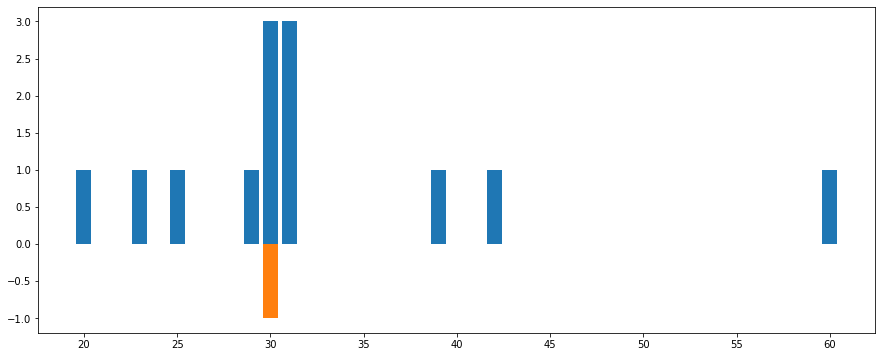

In [215]:
data_kovivak = data_clean[data_clean['вакцина'] == 'ковивак'][['sex', 'age', 'побочки']]

data_kovivak['побочки'] = data_kovivak['побочки'].replace({'Yes': 1, 'No': -1})
data_kovivak_female = data_kovivak[data_kovivak['sex'] == 1][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_kovivak_female_pos = data_kovivak_female[data_kovivak_female['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_kovivak_female_pos['age'], data_kovivak_female_pos['побочки'])

data_kovivak_female_neg = data_kovivak_female[data_kovivak_female['побочки'] == -1].groupby('age', as_index = False).count()
data_kovivak_female_neg['побочки'] = data_kovivak_female_neg['побочки'] * -1
plt.bar(data_kovivak_female_neg['age'], data_kovivak_female_neg['побочки'])

**Астра Зенека**

<BarContainer object of 0 artists>

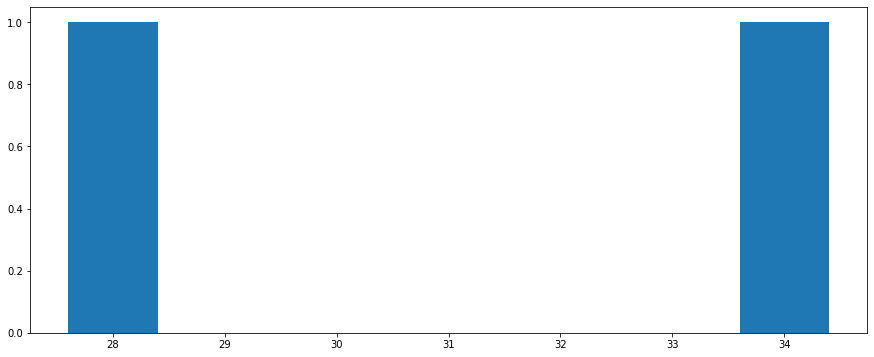

In [206]:
data_astra = data_clean[data_clean['вакцина'] == 'astra zeneca'][['sex', 'age', 'побочки']]

data_astra['побочки'] = data_astra['побочки'].replace({'Yes': 1, 'No': -1})
data_astra_male = data_astra[data_astra['sex'] == 0][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_astra_male_pos = data_astra_male[data_astra_male['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_astra_male_pos['age'], data_astra_male_pos['побочки'])

data_astra_male_neg = data_astra_male[data_astra_male['побочки'] == -1].groupby('age', as_index = False).count()
data_astra_male_neg['побочки'] = data_astra_male_neg['побочки'] * -1
plt.bar(data_astra_male_neg['age'], data_astra_male_neg['побочки'])

**Модерна**

<BarContainer object of 1 artists>

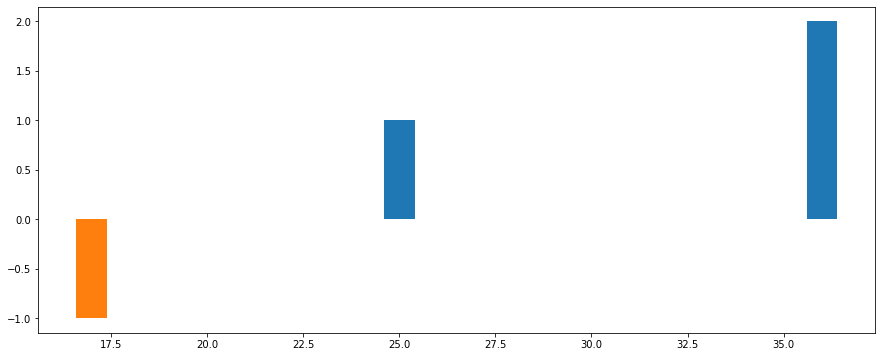

In [207]:
data_moderna = data_clean[data_clean['вакцина'] == 'moderna'][['sex', 'age', 'побочки']]

data_moderna['побочки'] = data_moderna['побочки'].replace({'Yes': 1, 'No': -1})
data_moderna_male = data_moderna[data_moderna['sex'] == 0][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_moderna_male_pos = data_moderna_male[data_moderna_male['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_moderna_male_pos['age'], data_moderna_male_pos['побочки'])

data_moderna_male_neg = data_moderna_male[data_moderna_male['побочки'] == -1].groupby('age', as_index = False).count()
data_moderna_male_neg['побочки'] = data_moderna_male_neg['побочки'] * -1
plt.bar(data_moderna_male_neg['age'], data_moderna_male_neg['побочки'])

<BarContainer object of 3 artists>

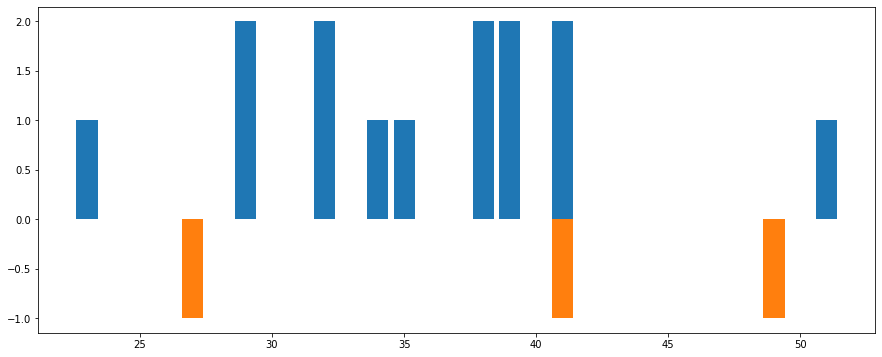

In [212]:
data_moderna = data_clean[data_clean['вакцина'] == 'moderna'][['sex', 'age', 'побочки']]

data_moderna['побочки'] = data_moderna['побочки'].replace({'Yes': 1, 'No': -1})
data_moderna_female = data_moderna[data_moderna['sex'] == 1][['age', 'побочки']]

plt.figure(figsize=(15, 6))

data_moderna_female_pos = data_moderna_female[data_moderna_female['побочки'] == 1].groupby('age', as_index = False).count()
plt.bar(data_moderna_female_pos['age'], data_moderna_female_pos['побочки'])

data_moderna_female_neg = data_moderna_female[data_moderna_female['побочки'] == -1].groupby('age', as_index = False).count()
data_moderna_female_neg['побочки'] = data_moderna_female_neg['побочки'] * -1
plt.bar(data_moderna_female_neg['age'], data_moderna_female_neg['побочки'])

Делаем следующие выводы. За период с 2021-го до текущего момента популярность по нисходящей следующая:
1. Спутник - 3644
2. Ковивак - 50
3. Moderna - 21
4. Эпиваккорона - 15
5. Astra Zeneca - 2

Определить форму распределения для остальных, как в случае со спутником, не представляется возможным из-за недостатка данных. Можно отметить, что количество людей с побочными эффектами также превалирует над количеством людей без побочек. 